In [8]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
redwine = pd.read_csv('https://archive.ics.uci.edu'
                      '/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')
redwine_X, redwine_y = redwine.iloc[:,:-1], redwine.iloc[:,-1]

In [10]:
%%time
grid = GridSearchCV(XGBClassifier(), param_grid={'max_depth' : [3,5,7,9],
                                                 'subsample' : [0.4, 0.6, 0.8, 1.0]},
                    verbose=2)
grid.fit(redwine_X, redwine_y-3)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................max_depth=3, subsample=0.4; total time=   0.0s
[CV] END .........................max_depth=3, subsample=0.4; total time=   0.0s
[CV] END .........................max_depth=3, subsample=0.4; total time=   0.0s
[CV] END .........................max_depth=3, subsample=0.4; total time=   0.0s
[CV] END .........................max_depth=3, subsample=0.4; total time=   0.0s
[CV] END .........................max_depth=3, subsample=0.6; total time=   0.0s
[CV] END .........................max_depth=3, subsample=0.6; total time=   0.0s
[CV] END .........................max_depth=3, subsample=0.6; total time=   0.0s
[CV] END .........................max_depth=3, subsample=0.6; total time=   0.0s
[CV] END .........................max_depth=3, subsample=0.6; total time=   0.0s
[CV] END .........................max_depth=3, subsample=0.8; total time=   0.0s
[CV] END .........................max_depth=3, s

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'subsample': [0.4, 0.6, 0.8, 1.0]},
             verbose=2)

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

In [24]:
from sklearn.svm import SVC
model = SVC().fit(X,y)
model

SVC()

In [25]:
model.score(X,y)

0.996661101836394

In [26]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [27]:
import numpy as np
param_range = np.logspace(-6, -1, 10)

In [18]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=-1)

CPU times: total: 359 ms
Wall time: 7.78 s


In [22]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

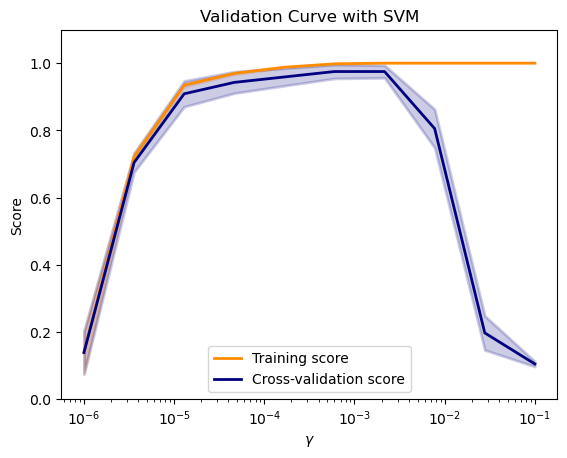

In [23]:
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="darkorange", lw=2)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=2)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=2)
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.show()

In [28]:
gamma = param_range[test_scores_mean.argmax()]
from sklearn.svm import SVC
model = SVC(gamma=gamma).fit(X,y)

In [30]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(model, X, y, cv=5))

0.9655137728257506

In [36]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline

In [34]:
redwind = pd.read_csv("winequality-red.csv", sep=";")
redwine_X, redwine_y = redwine.iloc[:,:-1], redwine.iloc[:,-1]

In [37]:
selection = SelectKBest(k=1)
svm = SVC(kernel="linear")
pipeline = Pipeline([("univ_select", selection), ("svm", svm)])
param_grid = dict(univ_select__k=[4,5,6,7,8,9,10,11],
                  svm__C=[0.1,1,10])
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=2, verbose=10)
grid_search.fit(redwine_X, redwine_y)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV 1/2; 1/24] START svm__C=0.1, univ_select__k=4...............................
[CV 1/2; 1/24] END svm__C=0.1, univ_select__k=4;, score=0.516 total time=   0.0s
[CV 2/2; 1/24] START svm__C=0.1, univ_select__k=4...............................
[CV 2/2; 1/24] END svm__C=0.1, univ_select__k=4;, score=0.584 total time=   0.0s
[CV 1/2; 2/24] START svm__C=0.1, univ_select__k=5...............................
[CV 1/2; 2/24] END svm__C=0.1, univ_select__k=5;, score=0.516 total time=   0.0s
[CV 2/2; 2/24] START svm__C=0.1, univ_select__k=5...............................
[CV 2/2; 2/24] END svm__C=0.1, univ_select__k=5;, score=0.589 total time=   0.0s
[CV 1/2; 3/24] START svm__C=0.1, univ_select__k=6...............................
[CV 1/2; 3/24] END svm__C=0.1, univ_select__k=6;, score=0.519 total time=   0.1s
[CV 2/2; 3/24] START svm__C=0.1, univ_select__k=6...............................
[CV 2/2; 3/24] END svm__C=0.1, univ_select__k=6;

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('univ_select', SelectKBest(k=1)),
                                       ('svm', SVC(kernel='linear'))]),
             param_grid={'svm__C': [0.1, 1, 10],
                         'univ_select__k': [4, 5, 6, 7, 8, 9, 10, 11]},
             verbose=10)

In [38]:
grid_search.score(redwine_X, redwine_y)

0.5878674171357098

In [39]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=10, n_informative=5, n_redundant=0, n_clusters_per_class=1,
                           n_classes=2, weights=[0.99, 0.01], random_state=42)

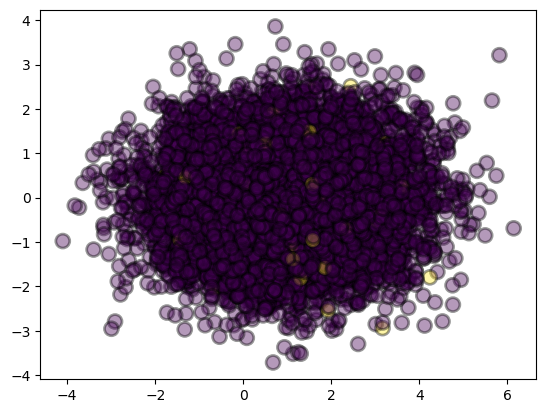

In [40]:
plt.scatter(x=X[:,0], y=X[:,1], marker='o', c=y, s=100, edgecolor="k", linewidth=2, alpha=0.4)
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_features=2, random_state=42)
rf_model.fit(train_X, train_y)

RandomForestClassifier(max_features=2, random_state=42)

In [43]:
rfc_pred = rf_model.predict(test_X)
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, rfc_pred)

array([[2960,    0],
       [  36,    4]], dtype=int64)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(test_y, rfc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2960
           1       1.00      0.10      0.18        40

    accuracy                           0.99      3000
   macro avg       0.99      0.55      0.59      3000
weighted avg       0.99      0.99      0.98      3000



In [45]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X,y)

In [46]:
X_resampled.shape, y_resampled.shape

((19720, 10), (19720,))

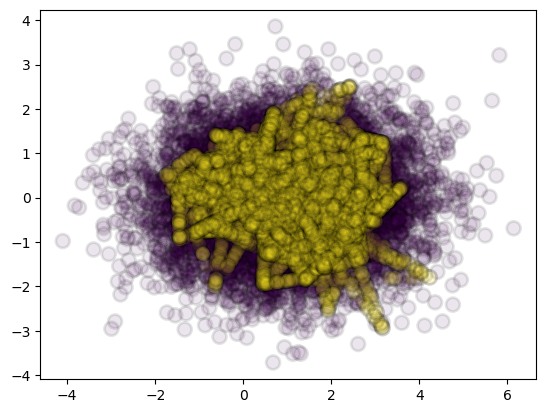

In [47]:
plt.scatter(x=X_resampled[:,0], y=X_resampled[:,1], marker='o', c=y_resampled, s=100, edgecolor="k", linewidth=2, alpha=0.1)
plt.show()

In [48]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X_resampled, y_resampled, test_size=0.3, shuffle=True, random_state=42)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((13804, 10), (5916, 10), (13804,), (5916,))

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_features=2, random_state=42)
rf_model.fit(train_X, train_y)

RandomForestClassifier(max_features=2, random_state=42)

In [50]:
pred = rf_model.predict(test_X)
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, pred)

array([[2963,    5],
       [  28, 2920]], dtype=int64)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2968
           1       1.00      0.99      0.99      2948

    accuracy                           0.99      5916
   macro avg       0.99      0.99      0.99      5916
weighted avg       0.99      0.99      0.99      5916



In [52]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=10, n_informative=5, n_redundant=0, n_clusters_per_class=1,
                           n_classes=2, weights=[0.99, 0.01], random_state=42)

In [53]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [55]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
resampled_X, resampled_y = sm.fit_resample(train_X, train_y)
resampled_X.shape, resampled_y.shape

((13804, 10), (13804,))

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_features=2, random_state=42)
rf_model.fit(resampled_X, resampled_y)

RandomForestClassifier(max_features=2, random_state=42)

In [58]:
pred = rf_model.predict(test_X)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(test_y, pred)

array([[2955,    3],
       [  26,   16]], dtype=int64)

In [59]:
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2958
           1       0.84      0.38      0.52        42

    accuracy                           0.99      3000
   macro avg       0.92      0.69      0.76      3000
weighted avg       0.99      0.99      0.99      3000



In [61]:
import pandas as pd
wine_df = pd.read_csv("https://archive.ics.uci.edu"
                      "/ml/machine-learning-databases/wine/wine.data",
                      header=None)

In [64]:
wine_df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

In [65]:
wine_df = wine_df[wine_df['Class label'] != 1]
X = wine_df[["Alcohol", "Hue"]].values
y = wine_df["Class label"].values

In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [68]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.4, random_state=1)
train_y, test_y

(array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
        0, 1, 0, 1, 0], dtype=int64),
 array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
        0, 1, 1, 1], dtype=int64))

In [69]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=1)
tree.fit(train_X, train_y,)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [70]:
tree.score(test_X, test_y)

0.8333333333333334

In [71]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(base_estimator=tree, n_estimators=500, bootstrap=True, bootstrap_features=False, random_state=1)
bag.fit(train_X, train_y)

C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        random_state=1),
                  n_estimators=500, random_state=1)

In [72]:
bag.score(test_X, test_y)

0.8958333333333334

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(n_estimators=500, random_state=1)
gbm.fit(train_X, train_y)

GradientBoostingClassifier(n_estimators=500, random_state=1)

In [74]:
gbm.score(test_X, test_y)

0.875

In [75]:
!pip install xgboost

In [76]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(train_X, train_y, eval_metric='logloss')

C:\Users\kosa\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [77]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(train_X, train_y)

[LightGBM] [Info] Number of positive: 25, number of negative: 46
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 71, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.352113 -> initscore=-0.609766
[LightGBM] [Info] Start training from score -0.609766
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

LGBMClassifier()

In [78]:
lgbm.score(test_X, test_y)

0.8958333333333334

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb_param_